FINAL FILE: Zip and decade level database with zip level average daily water consumption, zip-decade wise average daily precipitation, ww plant connected to zip, daily flow and capacity of ww plant. Placed here : "https://drive.google.com/drive/u/1/folders/1YvKEkVFzqI5P9Tofiml-MDXxjvqPpYFH" (NYC_CSO_zip_wwplant_final_output.csv)

NOTES: 
1. The zipcode level water consumption data was taken from the processed output table "FinalOutPut_Daily_wateruse_2015". Any zipcodes not present in that table were assumed to have zero consumption
2. The precipitation data was taken from "https://www.ncdc.noaa.gov/cag/county/mapping/30/pcp/202001/12/anomaly" at a county-month level. The monthly data was summed up to decade level from 1900-2020 and averaged for an average daily precipitation. The precipitation data was divided to zip level using zip level land area coverage from us census data and zip-county mapping. Any zipcode not having area data was considered to have zero precipitation

    a. The zip-area mapping had some zipcodes (~20%) assigned to multiple counties (for e.g. 12083 : Albany County , Greene County). The first county was assumed to be primary county for distribution of county precipitation to zip level


In [2]:
# !pip uninstall rtree
# !sudo apt install libspatialindex-dev
# !pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (422 kB/s)
debconf: unable to initialize frontend: Dialog
deb

In [3]:
# !pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 6.3 MB 54.9 MB/s 
     |████████████████████████████████| 16.7 MB 470 kB/s 


In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
# first analyze CSO outfalls data

In [5]:
# connecting to the google drive to load shape file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/

MyDrive  Shareddrives


# CSO and stormwater outfall data

In [ ]:
# Loading the CSO and stormwater outfall data to explore it
NYC_CSO_storm_outfall = gpd.read_file("drive/MyDrive/Capstone/Data/Waste_Water_CSOs/NYC Outfalls/NYC Outfalls.shp")


In [ ]:
# loading the NYC base file polygon
NYC_base = gpd.read_file('https://data.beta.nyc/dataset/0ff93d2d-90ba-457c-9f7e-39e47bf2ac5f/resource/35dd04fb-81b3-479b-a074-a27a37888ce7/download/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson')

In [ ]:
NYC_CSO_storm_outfall.outfall_ty.value_counts()

DIRECT     2343
HIGHWAY    1286
CSO         427
MS4         364
GENERAL     207
PLANT       125
STATE        64
ABND         34
Name: outfall_ty, dtype: int64

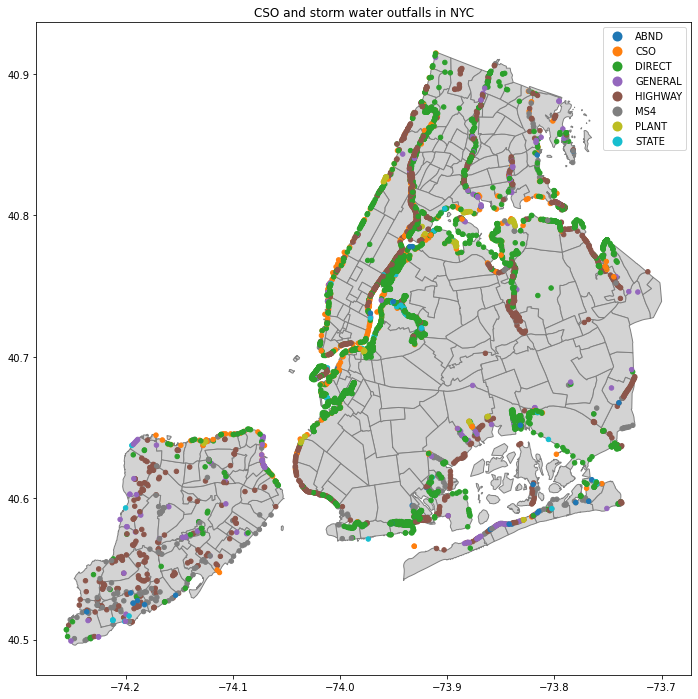

In [ ]:
# plotting the CSO and storm water outfalls in NYC

fig, ax = plt.subplots(figsize=(12,12))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# world.plot(ax=ax, color='white', edgecolor='black')
NYC_base.plot(ax=ax, color = 'lightgrey',edgecolor = 'grey')

NYC_CSO_storm_outfall.plot("outfall_ty",ax=ax, marker='o',  markersize=20,legend = True)

plt.title("CSO and storm water outfalls in NYC")
plt.show();


# CSO drainage shed data

In [ ]:
# loading the CSO drainage shed dataset

NYC_CSO_drain = gpd.read_file("drive/MyDrive/Capstone/Data/Waste_Water_CSOs/DEP_CSOsheds/DEP_CSOsheds_w_wttp.shp")


In [ ]:
# separating out the Waste water plant name from the "primary outfall" column given in dataset

NYC_CSO_drain['WW_plant_name'] = NYC_CSO_drain['PRIMARY_OU'].str.split('-',expand = True)[0]


In [ ]:

ww_treatment_plant_map = pd.read_csv("drive/MyDrive/Capstone/Data/Waste_Water_CSOs/ww_treatment_plant_mapping.csv")

In [ ]:
NYC_CSO_drain_viz = pd.merge(NYC_CSO_drain,ww_treatment_plant_map[['key','plant']],how='left',left_on = 'WW_plant_name',right_on = 'key')
NYC_CSO_drain_viz

,PRIMARY_OU,WW_plant_n,key_x,plant_x,geometry,WW_plant_name,key_y,plant_y
0,26W-003,26W,26W,26TH WARD,"POLYGON ((1011633.205 186964.365, 1011951.709 ...",26W,26W,26TH WARD
1,26W-004,26W,26W,26TH WARD,"POLYGON ((1018112.875 178370.845, 1017670.523 ...",26W,26W,26TH WARD
2,26W-005,26W,26W,26TH WARD,"MULTIPOLYGON (((1028934.187 179234.062, 102893...",26W,26W,26TH WARD
3,BB-002,BB,BB,BOWERY BAY,"POLYGON ((1013165.602 223180.006, 1013578.183 ...",BB,BB,BOWERY BAY
4,BB-003,BB,BB,BOWERY BAY,"POLYGON ((1014914.111 220938.901, 1015128.594 ...",BB,BB,BOWERY BAY
...,...,...,...,...,...,...,...,...
362,WIM-047,WIM,WIM,WARDS ISLAND,"POLYGON ((1002223.938 240715.516, 1002299.625 ...",WIM,WIM,WARDS ISLAND
363,WIM-048,WIM,WIM,WARDS ISLAND,"POLYGON ((1002187.375 241216.594, 1002210.875 ...",WIM,WIM,WARDS ISLAND
364,WIM-050,WIM,WIM,WARDS ISLAND,"POLYGON ((1001889.875 241555.859, 1001811.625 ...",WIM,WIM,WARDS ISLAND
365,WIM-051,WIM,WIM,WARDS ISLAND,"POLYGON ((1002344.000 246344.766, 1002106.500 ...",WIM,WIM,WARDS ISLAND


In [ ]:
import fiona

In [ ]:
NYC_CSO_drain_viz.to_file("drive/MyDrive/CUSP_Capstone_2022/Data/Waste_Water_CSOs/DEP_CSOsheds_w_wttp.shp")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


DriverIOError: ignored

CSO drainage: This shapefile has the drainage areas for each CSO outfall, or the area that contributes to each outfall. 

PRIMARY_OU: Primary Outfall. Name of outfall from DEP SPDES permit. The first two to three symbols are for the wastewater treatment plant (example: 26W = 26th Ward; RH=Red Hook). The third letter may represent the borough the outfall is in if the wastewater treatment plant serves more than one borough. For example Newtown Creek wastewater treatment plant serves Manhattan, Brooklyn and Queens, so outfalls are labeled NCM, NCB and NCQ respectively. 


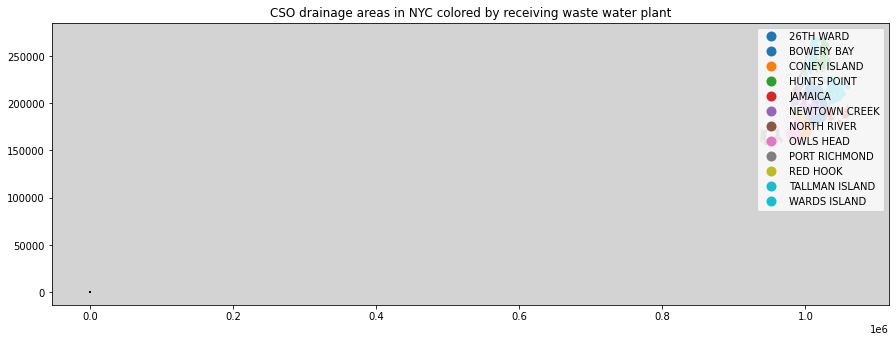

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))


NYC_CSO_drain = NYC_CSO_drain.to_crs(NYC_base.crs)
ax.set_aspect('equal')
ax.set_facecolor('lightgrey')

NYC_CSO_drain_viz.plot("plant_x",ax=ax, legend=True)
NYC_base.boundary.plot(ax=ax,color = 'black')



plt.title("CSO drainage areas in NYC colored by receiving waste water plant")
plt.show();



In [ ]:
!pip install contextily

In [6]:
#@title
# load the 2019 CSO outfall data also


NYC_CSO_outfall = gpd.read_file("drive/MyDrive/Capstone/Data/Waste_Water_CSOs/CSOs_2019/CSOs_2019.shp")
NYC_CSO_outfall

,latitude,location,longitude,of_size,outfall_ty,ownership,point_x,point_y,treatment,outfall_id,...,volume2014,events2013,volume2013,events2006,volume2006,discharge_,facility,spdes_id,events2018,geometry
0,40.905016,W 255TH STREET (REG # R-3),-73.913863,7' X 4',CSO,DEP,1.008061e+06,269011.4699,WI,WIB-053,...,72,65,64,0,30,Model,NYCDEP - Wards Island WPCP,NY0026131-053,82,POINT (-73.91386 40.90502)
1,40.897425,W 248TH STREET (REG # R-2),-73.916712,8' X 6',CSO,DEP,1.007276e+06,266245.2733,WI,WIB-054,...,54,47,47,0,28,Model,NYCDEP - Wards Island WPCP,NY0026131-054,59,POINT (-73.91671 40.89743)
2,40.914885,750' n/o W 261st Street (Reg # R-4),-73.910633,"18"" DIA",CSO,DEP,1.008950e+06,272608.1014,WI,WIB-079,...,0,0,0,0,0,Model,NYCDEP - Wards Island WPCP,NY0026131-079,0,POINT (-73.91063 40.91488)
3,40.888469,W 236TH STREET (REG # R-1),-73.920079,"6' X 4' 6""",CSO,DEP,1.006348e+06,262981.3333,WI,WIB-055,...,27,24,51,0,9,Model,NYCDEP - Wards Island WPCP,NY0026131-055,66,POINT (-73.92008 40.88847)
4,40.870251,W 192ND STREET (REG # 67),-73.909187,"DBL 15' X 9' 2""",CSO,DEP,1.009367e+06,256346.6055,WI,WIB-056,...,1200,1065,54,0,1543,Monitoring,NYCDEP - Wards Island WPCP,NY0026131-056,65,POINT (-73.90919 40.87025)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,40.654431,HEAD OF HENDRIX CREEK (REG #1),-73.879673,"4BL 11' X 7'6""",CSO,DEP,1.017637e+06,177726.0127,26W,26W-004,...,334,100,1,5,98,Monitoring,NYCDEP - 26th Ward,NY0026212-005,6,POINT (-73.87967 40.65443)
422,40.797684,127TH STREET (WPCP OUTFALL),-73.840368,"60"" DIA",CSO,DEP,1.028448e+06,229935.0517,TI,TI-001,...,0,0,0,0,0,Monitoring,NYCDEP - Tallmans Island WPCP,NY0026239-001,0,POINT (-73.84037 40.79768)
423,40.650658,26TH WARD PLANT OUTFALL,-73.876834,"4BL 11' X 7' 6""",CSO,DEP,1.018427e+06,176352.6667,26W,26W-002,...,0,0,0,0,0,Model,NYCDEP - 26th Ward,NY0026212-002,0,POINT (-73.87683 40.65066)
424,40.631147,JAMAICA W.P.C.P. OUTFALL,-73.798198,"84"" DIA",CSO,DEP,1.040264e+06,169284.9276,JA,JAM-001,...,0,0,0,0,0,Monitoring,NYCDEP - Jamaica WPCP,NY0026115-001,0,POINT (-73.79820 40.63115)


In [7]:
NYC_zip_poly = gpd.read_file("drive/MyDrive/CUSP_Capstone_2022/Data/zip_code_polygon/ZIP_CODE_040114.shp")

In [8]:
NYC_CSO_outfall.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [10]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 31.5 MB/s 


In [12]:
import contextily as cx
cmap='tab20'
# NYC_CSO_drain_viz = NYC_CSO_drain_viz.to_crs('epsg:3857')
NYC_CSO_outfall = NYC_CSO_outfall.to_crs('epsg:3857')
NYC_zip_poly = NYC_zip_poly.to_crs('epsg:3857')
NYC_base = NYC_base.to_crs('epsg:3857')
# ax = NYC_CSO_drain_viz.plot('plant',cmap=cmap,legend=True,figsize=(30,30),alpha=0.7)
NYC_CSO_outfall.plot(ax=ax, marker='o', color='maroon',edgecolor = 'white', markersize=75)
NYC_zip_poly.boundary.plot(ax=ax,color = 'black')
NYC_zip_poly.apply(lambda x: ax.annotate(s=x['ZIPCODE'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()

NameError: ignored

# CSO outfall data

CSO Outfall : The location of each CSO outfall, where CSO discharges into the waterway.


NameError: ignored

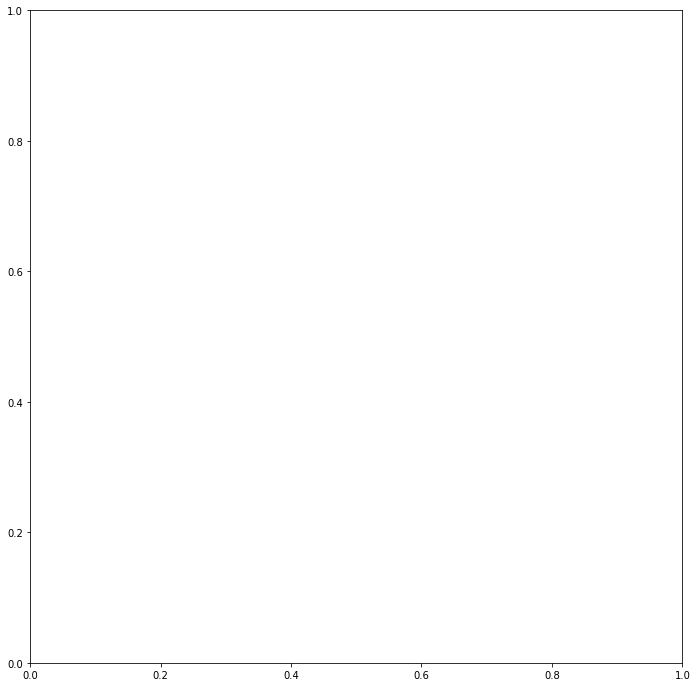

In [13]:
fig, ax = plt.subplots(figsize=(12,12))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# world.plot(ax=ax, color='white', edgecolor='black')
NYC_base.plot("borough",ax=ax, legend=True,figsize=(12,12))

NYC_CSO_outfall.plot(ax=ax, marker='^', color='black', markersize=30)

plt.title("CSO outfalls in NYC")
plt.show();


# Waste water map dataset

Zip  ,treatment plant  , treatment plant capacity , water demand ,precipitation,out flow , in flow ( keep same as outflow ; understand the losses), is capacity =flow      -per Day
For precipitation find something populated - average for now if that is what is available
We can vary precipitation and see different scenarios
Supply map : supply not change in short term

1. Identify zips in each cso drainage shed

In [14]:
# Loading the zip polygon file to explore it
NYC_zip_geo = gpd.read_file("drive/MyDrive/CUSP_Capstone_2022/Data/zip_code_polygon/ZIP_CODE_040114.shp")

NYC_zip_geo.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [ ]:
# !pip install pandas fiona shapely pyproj rtree

In [ ]:

# !pip install geopandas

In [15]:
# Spatial join with the cso outflow data to get zips in cso

NYC_zip_geo = NYC_zip_geo.to_crs(NYC_CSO_drain.crs)

import geopandas as gpd

NYC_zip_geo.sindex.valid_query_predicates
NYC_CSO_drain_zip = gpd.sjoin(NYC_CSO_drain,NYC_zip_geo[['ZIPCODE','geometry']],how = 'inner',predicate = 'intersects')

# NYC_zip_geo[NYC_zip_geo.POPULATION == NYC_zip_geo.POPULATION.min()]

NameError: ignored

In [ ]:
NYC_CSO_drain_zip.WW_plant_name.unique()

In [ ]:
ww_treatment_plant_map = pd.read_csv('drive/MyDrive/CUSP_Capstone_2022/Data/Waste_Water_CSOs/ww_treatment_plant_mapping.csv')
ww_treatment_plant_map

In [ ]:
NYC_CSO_drain_zip = pd.merge(NYC_CSO_drain_zip,ww_treatment_plant_map,how='left',left_on = 'WW_plant_name',right_on = 'key')


In [ ]:
NYC_CSO_drain_zip = NYC_CSO_drain_zip[['ZIPCODE','plant','Flow_annual_avg_MGD','Capacity']].drop_duplicates()

In [ ]:
NYC_CSO_drain_zip

In [ ]:
# getting a spatial map of the zipcode level drain data

NYC_CSO_ww_geo = NYC_CSO_drain_zip

In [ ]:
# getting the zipcode level demand data

water_demand = pd.read_csv("drive/MyDrive/CUSP_Capstone_2022/Data/WaterUse/FinalOutPut_Daily_wateruse_2015.csv")
water_demand.shape

In [ ]:
# only keeping relevant column and checking for uniqueness at zip level
water_demand = water_demand[['Postcode','Total_daily_wateruse(kgal/d)']].drop_duplicates()
water_demand.shape

In [ ]:
water_demand['Postcode'] = water_demand['Postcode'].astype(str)
water_demand.dtypes

In [ ]:
# join with demand data to get demand

NYC_CSO_drain_zip = pd.merge(NYC_CSO_drain_zip,water_demand,how = 'left',left_on = 'ZIPCODE',right_on = 'Postcode')
NYC_CSO_drain_zip.head()

In [ ]:
NYC_CSO_drain_zip[NYC_CSO_drain_zip['Total_daily_wateruse(kgal/d)'].isna()].shape

There are 31 zipcodes without any water use data

In [ ]:
# getting decade wise precipitation data

decade_county_precipitation = pd.read_csv('drive/MyDrive/CUSP_Capstone_2022/Data/Waste_Water_CSOs/NY_state_county_level_precipitation_1901-2020.csv')
decade_county_precipitation = decade_county_precipitation[['Decade','Location','precipitation_avg']]  

In [ ]:
decade_county_precipitation['County'] = decade_county_precipitation['Location']

In [ ]:
decade_county_precipitation_pivot = pd.pivot_table(decade_county_precipitation,values = 'precipitation_avg',index = 'County',columns = 'Decade').reset_index()
decade_county_precipitation_pivot.head()

In [ ]:
# get zipcode level land area mapping to join with precipitation data

zip_land_area = pd.read_csv('drive/MyDrive/CUSP_Capstone_2022/Data/Waste_Water_CSOs/NY_state_zip_land_area_2010_census.csv',converters={'ZIP Code': '{:0>5}'.format})
zip_land_area.dtypes

zip_land_area = zip_land_area[['ZIP Code','county updated','Land Area (Sq. Meters)']]

In [ ]:
zip_land_area[zip_land_area['ZIP Code'] == '11370']

In [ ]:
# merge zipcode land area and county precipitation data

zip_level_precipitation = pd.merge(zip_land_area,decade_county_precipitation_pivot,how = 'inner',left_on = 'county updated',right_on = 'County')

zip_level_precipitation.head()

In [ ]:
zip_level_precipitation[zip_level_precipitation['ZIP Code'] == '11370']

In [ ]:
zip_level_precipitation.shape

In [ ]:
zip_land_area.shape,decade_county_precipitation_pivot.shape

In [ ]:
# county pivoted decade level data
# join with zip code
# get geo share of each zip code in each county as per land
# multiply share to average precipitation
# join with main data and pivot down

In [ ]:
# share of each zipcode

county_share = zip_level_precipitation[['County','Land Area (Sq. Meters)']].groupby('County').sum().reset_index()
county_share = county_share.rename(columns={"Land Area (Sq. Meters)": "county_area"})

In [ ]:
# join back with zip level data

zip_level_precipitation = pd.merge(zip_level_precipitation,county_share,how = 'left',left_on = 'County',right_on = 'County')
zip_level_precipitation.head()

In [ ]:
zip_level_precipitation[zip_level_precipitation['County'] == 'Suffolk County']['Land Area (Sq. Meters)'].sum()

In [ ]:
zip_level_precipitation['zip_precip_share'] = zip_level_precipitation['Land Area (Sq. Meters)']/zip_level_precipitation['county_area']
zip_level_precipitation.head()


In [ ]:
zip_level_precipitation[1901]

In [ ]:
year = [1901,1911,1921,1931,1941,1951,1961,1971,1981,1991,2001,2011]

for i in year:
  zip_level_precipitation[i] = zip_level_precipitation[i]*zip_level_precipitation['zip_precip_share']

In [ ]:
zip_level_precipitation

In [ ]:
test = zip_level_precipitation[['County',1901,1911,1921,1931,1941,1951,1961,1971,1981,1991,2001,2011]].groupby('County').sum()
test

In [ ]:
test.sum()

In [ ]:
decade_county_precipitation_pivot.sum()

In [ ]:
zip_level_precipitation_final = pd.DataFrame(columns=['ZIP Code','County','Decade'])


# zip_level_precipitation[['ZIP Code','County',1901]]
# zip_level_precipitation[['ZIP Code','County',1911]]
# for 
year = [1901,1911,1921,1931,1941,1951,1961,1971,1981,1991,2001,2011]
# year1 = [1901]
for i in year:
  dummy = zip_level_precipitation[['ZIP Code','County',i]]
  dummy = dummy.rename(columns = {i: "Average Precipitation/year"})
  dummy['Decade'] = i
  zip_level_precipitation_final = pd.concat([zip_level_precipitation_final,dummy],axis=0,ignore_index=True)

In [ ]:
zip_level_precipitation_final.head()

In [ ]:
# multiply by 365 to get precipitation per day
zip_level_precipitation_final['Average Precipitation(inches/d)'] = zip_level_precipitation_final['Average Precipitation/year']/365

In [ ]:
zip_level_precipitation_final.head()

In [ ]:
NYC_CSO_drain_zip.head()


In [ ]:
# merging with the main data to get final database

NYC_CSO_zip_plant_final = pd.merge(NYC_CSO_drain_zip,zip_level_precipitation_final,left_on = 'ZIPCODE',right_on = 'ZIP Code',how = 'left')
NYC_CSO_zip_plant_final.head()

In [ ]:
zip_level_precipitation_final[zip_level_precipitation_final['ZIP Code'] == '11370']

In [ ]:
len(NYC_CSO_zip_plant_final[NYC_CSO_zip_plant_final['Average Precipitation(inches/d)'].isna()]['ZIPCODE'].unique())

In [ ]:
len(NYC_CSO_zip_plant_final['ZIPCODE'].unique())

In [ ]:
# making zip codes with NaN demand or NaN precipitation as zero

NYC_CSO_zip_plant_final = NYC_CSO_zip_plant_final[['ZIPCODE','County','Total_daily_wateruse(kgal/d)','Decade','Average Precipitation(inches/d)','plant','Flow_annual_avg_MGD','Capacity']].fillna(0)

NYC_CSO_zip_plant_final = NYC_CSO_zip_plant_final.rename(columns = {'Decade':'Precipitation_decade','plant':'wastewater_treat_plant','Capacity':'Capacity_MGD'})
NYC_CSO_zip_plant_final.head()

In [ ]:
NYC_CSO_zip_plant_final.to_csv("drive/MyDrive/CUSP_Capstone_2022/Data/Waste_Water_CSOs/NYC_CSO_zip_wwplant_final_output.csv")